In [1]:
import certifi; print(certifi.where())
import requests
print(requests.utils.DEFAULT_CA_BUNDLE_PATH)


D:\VMs\Anaconda\envs\DataMiningExample\Lib\site-packages\certifi\cacert.pem
D:\VMs\Anaconda\envs\DataMiningExample\Lib\site-packages\certifi\cacert.pem


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("star_dataset.csv")

In [4]:
df.dtypes

Name                  object
Distance (ly)        float64
Luminosity (L/Lo)    float64
Radius (R/Ro)        float64
Temperature (K)      float64
Spectral Class        object
dtype: object

In [5]:
df.describe()

,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,295.505327,19644.909442,86.960696,9983.486779
std,541.478403,42223.595017,213.850005,7906.973529
min,3.877798,-4.993141,0.068087,2750.183163
25%,11.716853,10.441039,1.664479,3940.020856
50%,52.031435,171.097809,5.845444,7379.007975
75%,322.865874,10500.577117,33.719778,12055.975095
max,2600.490723,196004.854081,887.097936,28044.279272


In [6]:
df.head()


,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve


In [7]:
df.isna().sum()
#ok now this is epic
df = df.sort_values(by='Spectral Class')

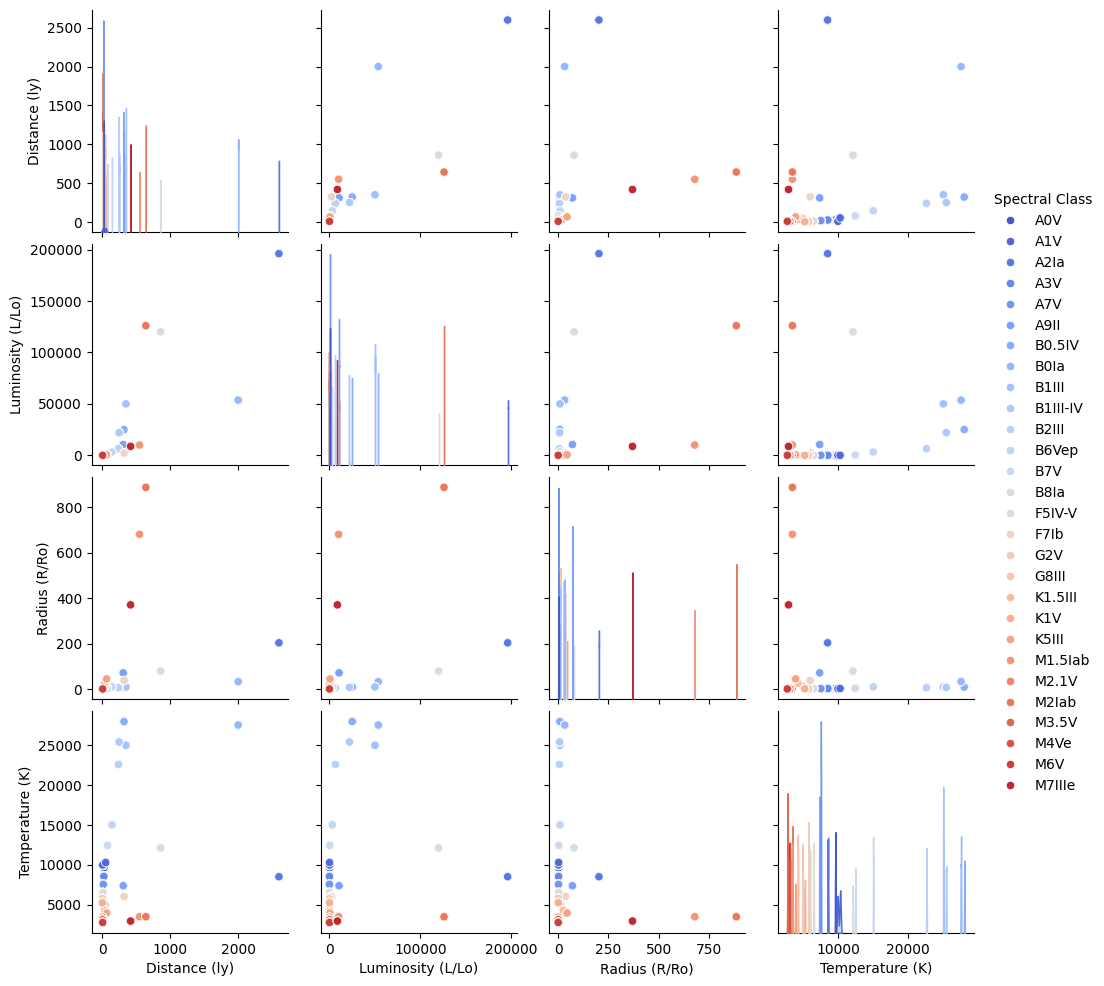

In [8]:
sns.pairplot(df, hue='Spectral Class', palette="coolwarm")
plt.show()

<Axes: title={'center': 'Total Data Count'}, xlabel='Spectral Classes', ylabel='Count'>

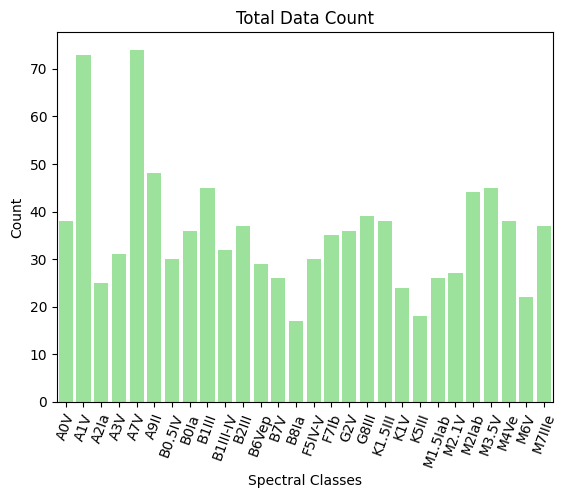

In [9]:
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Spectral Classes')
plt.title('Total Data Count')

sns.countplot(x= 'Spectral Class', data=df, color="lightgreen")

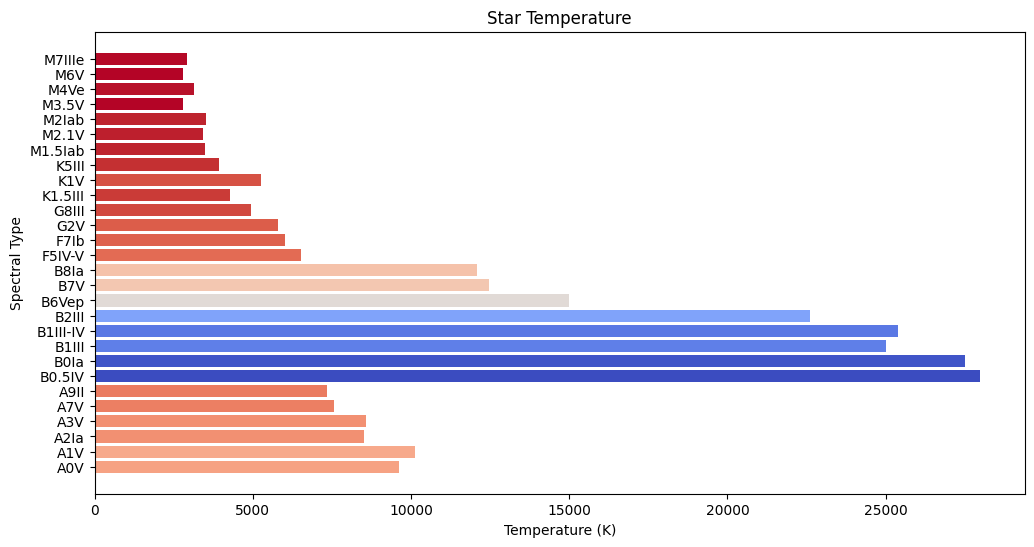

In [10]:
df_temp = df.groupby('Spectral Class')['Temperature (K)'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

cmap = plt.get_cmap('coolwarm_r')
norm = plt.Normalize(vmin=df_temp['Temperature (K)'].min(), vmax=df_temp['Temperature (K)'].max())
colors = cmap(norm(df_temp['Temperature (K)']))
bars = ax.barh(df_temp['Spectral Class'], df_temp['Temperature (K)'], color=colors)

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Spectral Type')
ax.set_title('Star Temperature')

plt.show()

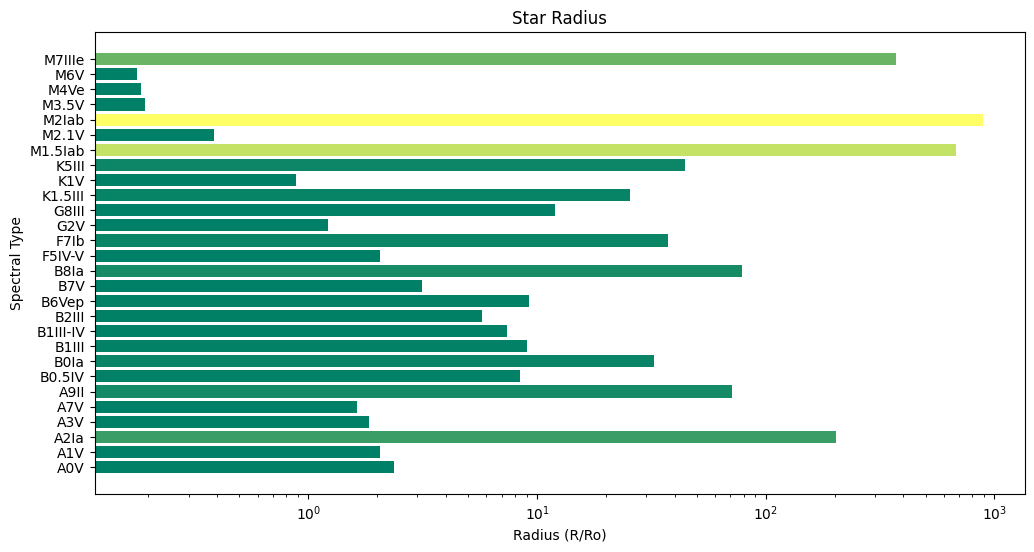

In [11]:
df_temp = df.groupby('Spectral Class')['Radius (R/Ro)'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

cmap = plt.get_cmap('summer')
norm = plt.Normalize(vmin=df_temp['Radius (R/Ro)'].min(), vmax=df_temp['Radius (R/Ro)'].max())
colors = cmap(norm(df_temp['Radius (R/Ro)']))
bars = ax.barh(df_temp['Spectral Class'], df_temp['Radius (R/Ro)'], color=colors)

ax.set_xscale('log')

ax.set_xlabel('Radius (R/Ro)')
ax.set_ylabel('Spectral Type')
ax.set_title('Star Radius')

plt.show()

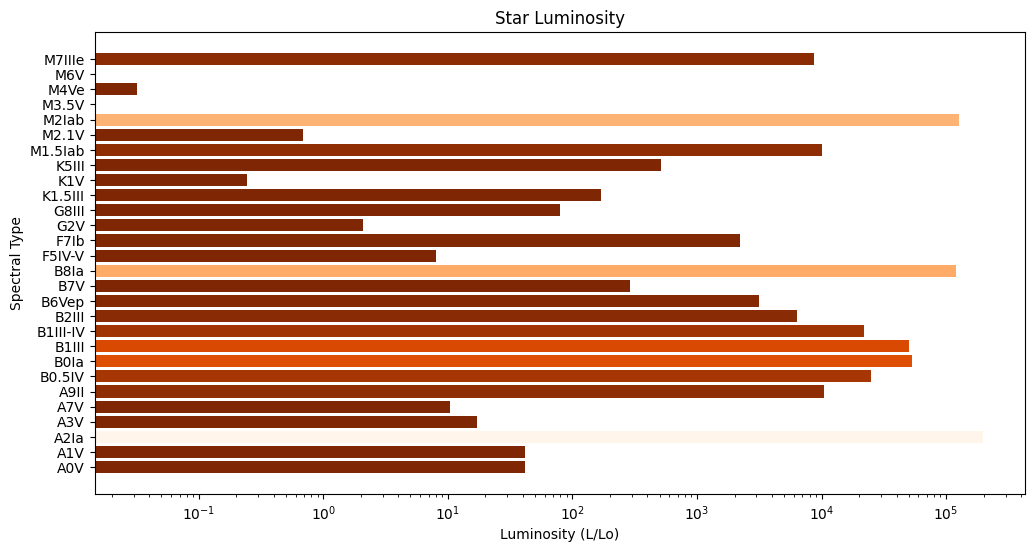

In [12]:
df_temp = df.groupby('Spectral Class')['Luminosity (L/Lo)'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

cmap = plt.get_cmap('Oranges_r')
norm = plt.Normalize(vmin=df_temp['Luminosity (L/Lo)'].min(), vmax=df_temp['Luminosity (L/Lo)'].max())
colors = cmap(norm(df_temp['Luminosity (L/Lo)']))
bars = ax.barh(df_temp['Spectral Class'], df_temp['Luminosity (L/Lo)'], color=colors)

ax.set_xscale('log')

ax.set_xlabel('Luminosity (L/Lo)')
ax.set_ylabel('Spectral Type')
ax.set_title('Star Luminosity')

plt.show()

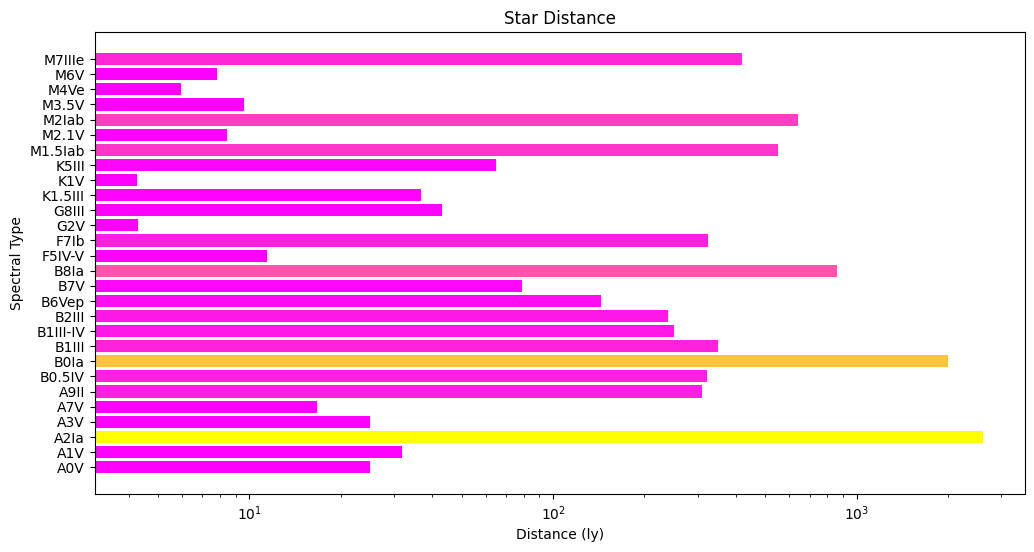

In [13]:
df_temp = df.groupby('Spectral Class')['Distance (ly)'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

cmap = plt.get_cmap('spring')
norm = plt.Normalize(vmin=df_temp['Distance (ly)'].min(), vmax=df_temp['Distance (ly)'].max())
colors = cmap(norm(df_temp['Distance (ly)']))
bars = ax.barh(df_temp['Spectral Class'], df_temp['Distance (ly)'], color=colors)

ax.set_xscale('log')

ax.set_xlabel('Distance (ly)')
ax.set_ylabel('Spectral Type')
ax.set_title('Star Distance')

plt.show()

In [14]:
df = df.drop('Name', axis=1)

X = df.drop('Spectral Class', axis=1)
y = df['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print(f"Test points: {X_test}")
#print(f"Predictions: {y_pred}")

accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy*100:.2f}%')


KNN Accuracy: 97.67%
